
<center>
  <img src="https://static.independent.co.uk/2023/06/12/13/newFile-3.jpg?quality=75&width=990&crop=3%3A2%2Csmart&auto=webp" alt="Melbourne"
       width=693 height=420>
  <figcaption itemprop="Melbourne"><a href="https://www.independent.co.uk/travel/australasia/australia/melbourne/melbourne-city-guide-best-things-hotels-b2355896.html">Melbourne</a></figcaption>
</center>

* Melbourne is the capital and largest city of the Australian state of Victoria, and the second-most populous city in Australia.
* The dataset consist of several variables of the houses in Melbourne along with their prices. For more information about dataset variables, see **"Key Details of Variables"** below.

📖 **Project Contents**:

* [EDA (Exploratory Data Analysis)](#section-one)
* [Feature Engineering](#section-two)
    1. [Feature Extraction](#section-three)
    2. [Dropping High Correlated Variables](#section-four)
    3. [Handling Duplicated Rows](#section-five)
    4. [Missing Values Handling](#section-six)
    5. [Outlier Handling](#section-seven)
    6. [Encoding](#section-eight)
* [Model Building](#section-nine)
    1. [Model Training for Baseline Score](#section-ten)
    2. [Visual Comparing of Model Performances](#section-eleven)
    3. [Hyper-parameter Optimization](#section-twelve)
    4. [Feature Importance Visualization of Best Model](#section-thirteen)
        - [Feature Importance](#section-fourteen)
        - [Permutation Importance](#section-fifteen)
    5. [Building and Saving Best Model](#section-sixteen)

---
<details>
<summary><b> 🔑 Key Details of Variables</b></summary>
    
* Suburb
* Address
* Rooms: Number of rooms
* Price: Price in Australian dollars, target variable
* Method: 
    - S  = property sold
    - SP = property sold prior
    - PI = property passed in
    - PN = sold prior not disclosed
    - SN = sold not disclosed
    - NB = no bid
    - VB = vendor bid
    - W  = withdrawn prior to auction
    - SA = sold after auction
    - SS = sold after auction price not disclosed
    - N/A = price or highest bid not available.
* Type: 
    - br = bedroom(s)
    - h  = house,cottage,villa, semi,terrace
    - u  = unit, duplex
    - t  = townhouse
    - dev site = development site
    - o res = other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude
* Longtitude
</details>

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.impute import KNNImputer

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import eli5
from eli5.sklearn import PermutationImportance

pd.set_option('display.float_format',  '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,2.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,3.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


<a id="section-one"></a>
# **EDA**

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [5]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
df_copy.duplicated().sum()

1

In [7]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [8]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.000,3.031,0.970,1.000,2.000,3.000,4.000,16.000
Price,27247.000,1050173.345,641467.130,85000.000,635000.000,870000.000,1295000.000,11200000.000
Distance,34856.000,11.185,6.789,0.000,6.400,10.300,14.000,48.100
Postcode,34856.000,3116.063,109.024,3000.000,3051.000,3103.000,3156.000,3978.000
Bedroom2,26640.000,3.085,0.981,0.000,2.000,3.000,4.000,30.000
Bathroom,26631.000,1.625,0.724,0.000,1.000,2.000,2.000,12.000
Car,26129.000,1.729,1.011,0.000,1.000,2.000,2.000,26.000
Landsize,23047.000,593.599,3398.842,0.000,224.000,521.000,670.000,433014.000
BuildingArea,13742.000,160.256,401.267,0.000,102.000,136.000,188.000,44515.000
YearBuilt,15551.000,1965.290,37.328,1196.000,1940.000,1970.000,2000.000,2106.000


**Insights of Initial Analysis:**

- The dataset consist of 34857 row and 21 variable.
- 8 of the variables are categorical data type, and the rest (13) are numerical data type.
- A little more than half of the variables (14) have one or more missing values.
- There is only one duplicated data.
- According to descriptive statistical analysis:
    * Some variables such as "Price, Landsize, BuildingArea (...)" may have an outlier data.
    * Also, some variables have a minimum value of 0. "Distance" and "Car" can be 0. However, "Bedroom, Bathroom, Landsize and BuildingArea" cannot have a minimum value of 0. A value of 0 in these four variables will be **considered as a missing value**.
    * Additionally, how can a house be built in the distant future in 2106 and in the distant past in 1196, or how can a house be built years after it has been sold? These data will also be **considered as missing values**.

In [9]:
cat_cols = ['Suburb', 'Address', 'Type', 'Method', 
            'SellerG', 'Date', 'CouncilArea', 'Regionname']
num_cols = [col for col in df_copy.columns if col not in cat_cols]

<a id="section-two"></a>
# **FEATURE ENGINEERING**

* The following topics will be covered in this section:
    1. Feature Extraction
    2. Dropping High Correlated Variables
    3. Handling Duplicated Rows
    4. Missing Values Handling
    5. Outlier Handling
    6. Encoding and Scaling

<a id="section-three"></a>
## **1. Feature Extraction**

3 new features will be extracted from the "Date" variable. These new features are: **Year**, **month** and **day** the house was sold. Additionally, another feature will be extracted from "YearBuilt". The new feature, "**Building_Age**", will be obtained by subtracting today's date from the year the house was built.
* **Year:** The dataset consists of data for 3 years.

<table>
  <tr>
    <th>Years</th>
    <td>2016</td>
    <td>2017</td>
    <td>2018</td>
  </tr>
  <tr>
    <th>Number of Sold House</th>
    <td>10292</td>
    <td>19852</td>
    <td>4713</td>
  </tr>
</table>

* **Day:** The houses were sold on 5 different days. As expected, houses were sold **mostly on weekends**. By far the most house sales took place on **Saturday**.

<table>
  <tr>
    <th>Days</th>
    <td>Monday</td>
    <td>Tuesday</td>
    <td>Wednesday</td>
    <td>Thursday</td>
    <td>Friday</td>
    <td>Saturday</td>
    <td>Sunday</td>
  </tr>
  <tr>
    <th>Number of Sold House</th>
    <td>956</td>
    <td>199</td>
    <td>-</td>
    <td>47</td>
    <td>-</td>
    <td>31711</td>
    <td>1944</td>
  </tr>
</table>

* **Month:** The distribution of houses according to the months they were sold shows a balanced distributed.

<table>
  <tr>
    <th>Month</th>
    <td>January</td>
    <td>February</td>
    <td>March</td>
    <td>April</td>
    <td>May</td>
    <td>June</td>
    <td>July</td>
    <td>August</td>
    <td>September</td>
    <td>October</td>
    <td>November</td>
    <td>December</td>
  </tr>
  <tr>
    <th>Number of Sold House</th>
    <td>821</td>
    <td>2642</td>
    <td>3094</td>
    <td>1520</td>
    <td>3416</td>
    <td>3175</td>
    <td>2959</td>
    <td>2888</td>
    <td>4128</td>
    <td>3900</td>
    <td>4387</td>
    <td>1927</td>
  </tr>
</table>

In [10]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')

df_copy['Month_Sold'] = df_copy['Date'].dt.month
df_copy['Year_Sold'] = df_copy['Date'].dt.year
df_copy['Day_Sold'] = df_copy['Date'].dt.day_name()
df_copy['Date'] = df_copy['Date'].astype(str)

cat_cols.append('Day_Sold')

In [11]:
df_copy['Building_Age'] = datetime.now().year - df_copy['YearBuilt']
num_cols.append('Building_Age')

<a id="section-four"></a>
## **2. High Correlated Variables**

* The correlation between variables was examined with a threshold value of **.65**. One of the variables with a correlation above the threshold will be removed from the set.
* There is a strong correlation between **Rooms** and **Bedroom2**. “Bedroom2” has many more missing values than “Rooms”. Therefore 'Bedroom2' is the one to drop.

In [12]:
def find_correlated_features(dataframe, threshold):
    s = dataframe.corr(numeric_only=True).unstack().sort_values(ascending=False)
    return s[s.abs().between(threshold, 1, inclusive='left')].drop_duplicates()

find_correlated_features(df_copy, 0.65)

Bedroom2      Rooms        0.947
Building_Age  YearBuilt   -1.000
dtype: float64

In [13]:
df_copy.drop(['Bedroom2'], inplace=True, axis=1)
num_cols.remove('Bedroom2')

<a id="section-five"></a>
## **3. Duplicated Rows**

* As I said before, there is only one identical/duplicated data in the dataset. As I said before, there is only one identical data in the data set. as you can see below. The last one will be drop.

In [14]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,2017-06-17,15.400,3131.000,3.000,2.000,405.000,226.000,2000.000,Manningham City Council,-37.827,145.168,Eastern Metropolitan,4973.000,6,2017,Saturday,24.000
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,2017-06-17,15.400,3131.000,3.000,2.000,405.000,226.000,2000.000,Manningham City Council,-37.827,145.168,Eastern Metropolitan,4973.000,6,2017,Saturday,24.000


In [15]:
df_copy.drop_duplicates(inplace=True, keep="first")

<a id="section-six"></a>
## **4. Missing Values**

* Missing values was examined. The numbers and ratios for each variable can be seen below.
* There are a few things that stand out about missing values.
    - 'Bathroom', 'Landsize', 'BuildingArea' (and 'Bedroom2') their minimum values are 0. 
    -  Why **'Distance**' and '**Postcode**' have only 1 and '**CouncilArea, Regionname, Propertycount**' have only 3 missing value?  

In [16]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                    0.000
Address                               0                    0.000
Rooms                                 0                    0.000
Type                                  0                    0.000
Price                              7609                   21.830
Method                                0                    0.000
SellerG                               0                    0.000
Date                                  0                    0.000
Distance                              1                    0.003
Postcode                              1                    0.003
Bathroom                           8226                   23.600
Car                                8728                   25.040
Landsize                          11810                   33.882
BuildingArea                      21115                   60.578
YearBuilt                

* Let's change the values that  have a very unlikely of being 0 to NA.

In [17]:
cols_with_missing_value_0 = ['Bathroom', 'Landsize', 'BuildingArea']
df_copy[cols_with_missing_value_0 ].eq(0).sum()

Bathroom          46
Landsize        2437
BuildingArea      76
dtype: int64

In [18]:
for col in cols_with_missing_value_0: 
    df_copy[col].replace({0: np.nan}, inplace=True)
    
df_copy[['Bathroom', 'Landsize', 'BuildingArea']].eq(0).sum()

Bathroom        0
Landsize        0
BuildingArea    0
dtype: int64

* Let's change the values of the "YearBuilt" variable I mentioned before. There are **9** houses built after the sale and **4** houses built before 1850.

In [19]:
df_copy.loc[(df_copy['YearBuilt'] > df_copy['Year_Sold']) | (df_copy['YearBuilt'] < 1850), 'YearBuilt'] = np.nan

### **4.a. Postcode, Distance**

* The only missing data of these two variables is belong to 29483rd data. The 'Suburb' and 'Address' of this data are recorded as '**Fawkner Lot**' and '**1/3 Brain St**' respectively. That was the only data for the suburb 'Fawkner Lot'.
* While reviewing the dataset, I came across two data for the suburb "Fawkner Lot, 1/3 Brain St". However, these data were recorded as "**Fawkner**" and "**3 Brain St**". The only difference between these two data and data 29483 is "Date" (sales date).
* As a result, I filled in one of the missing values observed in 'Postcode, Distinct, CouncilArea, Regionname, Propertycount' with the fully registered 'Fawnker' data and changed Suburb variable "Fawnker Lot" 'to 'Fawnker'.

In [20]:
df_copy[df_copy["Postcode"].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
29483,Fawkner Lot,1/3 Brian St,3,h,616000.000,SP,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,Saturday,NaN


In [21]:
'Fawkner' in df_copy['Suburb'].unique()

True

In [22]:
df_copy.loc[(df_copy["Suburb"] == 'Fawkner') & (df_copy["Address"] == '3 Brian St')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
11247,Fawkner,3 Brian St,3,h,625000.000,S,Brad,2016-12-10,12.400,3060.000,1.000,2.000,585.000,88.000,1960.000,Hume City Council,-37.695,144.968,Northern Metropolitan,5070.000,12,2016,Saturday,64.000
12756,Fawkner,3 Brian St,3,h,660000.000,S,Brad,2017-04-08,12.400,3060.000,1.000,2.000,585.000,88.000,1960.000,Hume City Council,-37.695,144.968,Northern Metropolitan,5070.000,4,2017,Saturday,64.000


In [23]:
for col, val in zip(df_copy.iloc[11247,:].index, df_copy.iloc[11247,:].values):
    if col in ['Date', 'Month', 'Year']:
        pass
    else:
        df_copy.loc[df_copy.index==29483, col] = val

In [24]:
'Fawkner Lot' in df_copy['Suburb'].unique()

False

### **4.b. RegionArea, CouncilArea, Propertycount**

* All missing values (2) of these three variables belong to 18523rd and 26888th data. These data are respectively "**Footscray, 2/16 Stafford St**" and "**Camberwell, 2/3 Kingsley St**".
* Consequently, I filled in the missing values of "CouncilArea, Regionname, Propertycount" with the  values I found from the filtering "Suburb" and "Address".
* For "**Footscray, 2/16 Stafford St**" these values are "*Maribyrnong City Council, Western Metropolitan, 7570.0*" respectively and for "**Camberwell, 2/3 Kingsley St**" the values are "*Boroondara City Council, Southern Metropolitan, 8920.0*" respectively.



In [25]:
pd.concat([df_copy[df_copy['Regionname'].isnull()],
           df_copy[df_copy['CouncilArea'].isnull()],
           df_copy[df_copy['Propertycount'].isnull()]]).drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
18523,Footscray,2/16 Stafford St,2,u,710000.000,S,Jas,2017-07-15,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2017,Saturday,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.000,VB,Jellis,2017-11-11,7.700,3124.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2017,Saturday,NaN


In [26]:
footscray_sub_add_filter = (df_copy["Suburb"] == 'Footscray') & (df_copy["Address"] == '2/16 Stafford St')
camberwell_sub_add_filter = (df_copy["Suburb"] == 'Camberwell') & (df_copy["Address"] == '2/3 Kingsley St')

footscray_filter = df_copy["Suburb"] == 'Footscray'
camberwell_filter = df_copy["Suburb"] == 'Camberwell'

In [27]:
missing_cols = ['Regionname', 'CouncilArea', 'Propertycount']

for col in missing_cols:
    df_copy.loc[footscray_sub_add_filter, col] = df_copy.loc[footscray_filter][col].unique()[0]
    df_copy.loc[camberwell_sub_add_filter, col] = df_copy.loc[camberwell_filter][col].unique()[0]

### **4.c. Rest Of The Missing Values**

* The rest of the missing values are filled in with the mean of the nearest neighbors using the k-Nearest Neighbors method.
* The KNNImputer predicts the value of a missing value by observing trends in related columns. It then chooses the best fit value based on the k-Nearest Neighbors algorithm.

In [28]:
knn = KNNImputer(n_neighbors=5)
df_copy[num_cols] = knn.fit_transform(df_copy[num_cols])

<a id="section-seven"></a>
## **5. Outlier Handling**

Simply, a z-score (standard score) gives you an idea of how far from the mean a data point is. Z-score is measured in terms of standard deviations from the mean. It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation.
* 68% of the data points lie between +/- 1 standard deviation.
* 95% of the data points lie between +/- 2 standard deviation
* 99.7% of the data points lie between +/- 3 standard deviation

$$Z-Score = \frac{(x - mean)}{Standard Deviation} = \frac{(x - μ)}{σ} $$

There are some different ways to detect outliers when using z-score. The two ways below do the same thing, but how they do it is different.
* Detection of outliers using upper limit and lower limit using **3 standard deviations**
* Using **z-score (from -3 to 3)** to detect outliers.


<center>
    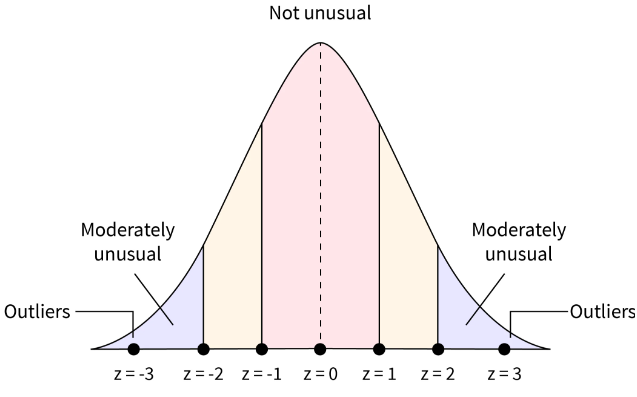
    <figcaption itemprop="Z-Score"><a href="https://www.scaler.com/topics/outlier-detection-methods-in-data-mining/">Z-Score</a></figcaption>
</center>

In [29]:
def outlier_thresholds(dataframe, variable, method, low_quantile=0.10, up_quantile=0.90):
    if method == 'iqr':
        quantile_one = dataframe[variable].quantile(low_quantile)
        quantile_three = dataframe[variable].quantile(up_quantile)
        interquantile_range = quantile_three - quantile_one
        up_limit = quantile_three + 1.5 * interquantile_range
        low_limit = quantile_one - 1.5 * interquantile_range
    elif method == 'z_score':
        up_limit = dataframe[variable].mean() + 3 * dataframe[variable].std()
        low_limit = dataframe[variable].mean() - 3 * dataframe[variable].std()
    else:
        pass
    return low_limit, up_limit

In [30]:
def check_outlier(dataframe, col_name, method):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, method)
    outliers = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    if dataframe[outliers].any(axis=None):
        return f'{True} {dataframe[col_name][outliers].count()}'
    else:
        return False

In [31]:
for col in num_cols:
    print(col, check_outlier(df_copy, col, 'z_score'))

Rooms True 269
Price True 617
Distance True 792
Postcode True 558
Bathroom True 377
Car True 360
Landsize True 71
BuildingArea True 25
YearBuilt True 47
Lattitude True 386
Longtitude True 393
Propertycount True 844
Building_Age True 51


In [32]:
def replace_with_thresholds(dataframe, variable, method, plot=False):
    dataframe_copy = dataframe.copy()

    low_limit, up_limit = outlier_thresholds(dataframe, variable, method)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(15,4))
        sns.histplot(dataframe_copy[variable], ax=axes[0], kde=True)
        sns.histplot(dataframe[variable], ax=axes[1], kde=True)
        axes[0].set_title(f"{variable} Before", fontsize=13)
        axes[1].set_title(f"{variable} After", fontsize=13)
        plt.tight_layout()

In [33]:
for col in num_cols:
    print(col, replace_with_thresholds(df_copy, col, 'z_score'))

Rooms None
Price None
Distance None
Postcode None
Bathroom None
Car None
Landsize None
BuildingArea None
YearBuilt None
Lattitude None
Longtitude None
Propertycount None
Building_Age None


<a id="section-eight"></a>
## **6. Encoding**

* The variable **"Address"**, which has a high cardinality and a unique value of 34009 (34008 due to the Fawkner Lot), was removed from the data set instead of encoding.

In [34]:
df_copy.drop(['Address', 'Date', 'YearBuilt'], inplace=True, axis=1)
cat_cols.remove('Address')
cat_cols.remove('Date')
num_cols.remove('YearBuilt')

In [35]:
for col in cat_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])

<a id="section-nine"></a>
# **Model Building**

* After *handling missing and outlier*, *extracting of new features* and *encoding all features*, long story short, **after Feature Engineering**, it is time to build and train **machine learning models**.
* This section contains:
    1. Model Building for Baseline Score
    2. Visual Comparing of Model Performances
    3. Hyper-parameter Optimization 
    4. Feature Importance Visualization of Best Model
        - Feature Importance
        - Permutation Importance
    5. Building and Saving Best Model

In [36]:
X = df_copy.drop(["Price"], axis=1)
y = df_copy["Price"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<a id="section-ten"></a>
## **1. Baseline Score**

* After splitting the data, 12 models were trained with the train data to **compare their performance**. 
* The performance metrics (R2, MAE, MSE and RMSE) **append a new dataframe** (df\_scores) to make things easier.
* The result shows us that Ensemble Models (LGBM, XGB, ...) have the best performance.

In [38]:
models = {'Lasso': {'model': Lasso()},
          'LinearRegression': {'model': LinearRegression()},
          'Ridge': {'model': Ridge()},
          'ElasticNet': {'model': ElasticNet()},
          'KNeighborsRegressor': {'model': KNeighborsRegressor()},
          'RandomForestRegressor': {'model': RandomForestRegressor()},
          'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
          'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, 
                                                           learning_rate = 1.2, 
                                                           loss = 'exponential', 
                                                           random_state = 2)},
          'DecisionTreeRegressor': {'model': DecisionTreeRegressor(max_depth = 9, 
                                                                   min_samples_split = 4, 
                                                                   random_state = 1)},
          'XGB': {'model': XGBRegressor(random_state=17, eval_metric='logloss')},
          'LightGBM': {'model': LGBMRegressor(random_state=17, verbose=-1)},
          'CatBoost': {'model': CatBoostRegressor(verbose=False)}}

In [39]:
df_scores = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

for name, regressor in models.items():
    print('Running: ', name)
    regressor['model'].fit(X_train, y_train)
    y_pred = regressor['model'].predict(X_test)
    y_train_pred = regressor['model'].predict(X_train)

    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_test = metrics.r2_score(y_test, y_pred)

    mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    r2_train = metrics.r2_score(y_train, y_train_pred)

    print('\n'.join([f'MAE  TEST:   {mae_test}',
                     f'MSE  TEST:   {mse_test}',
                     f'RMSE TEST:   {rmse_test}',
                     f'R2   TEST:   {r2_test}\n']))
    
    print('\n'.join([f'MAE  TRAIN:  {mae_train}',
                     f'MSE  TRAIN:  {mse_train}',
                     f'RMSE TRAIN:  {rmse_train}',
                     f'R2   TRAIN:  {r2_train}\n']))
    
    print("*************************\n")

    df_scores = df_scores._append({"Model": name,
                                   "MAE": mae_test,
                                   "MSE": mse_test,
                                   "RMSE": rmse_test,
                                   "R2": r2_test},
                                 ignore_index=True)

Running:  Lasso
MAE  TEST:   254561.64219694704
MSE  TEST:   121856276314.90977
RMSE TEST:   349079.18344540364
R2   TEST:   0.636397711344812

MAE  TRAIN:  253233.48609561013
MSE  TRAIN:  120391734913.02846
RMSE TRAIN:  346975.12146122014
R2   TRAIN:  0.6502366777187669

*************************

Running:  LinearRegression
MAE  TEST:   254562.29884365946
MSE  TEST:   121856368171.36047
RMSE TEST:   349079.315015027
R2   TEST:   0.6363974372578572

MAE  TRAIN:  253234.02020591486
MSE  TRAIN:  120391734679.49167
RMSE TRAIN:  346975.12112468766
R2   TRAIN:  0.6502366783972404

*************************

Running:  Ridge
MAE  TEST:   254550.09146620196
MSE  TEST:   121855618159.6403
RMSE TEST:   349078.24074215844
R2   TEST:   0.6363996751891827

MAE  TRAIN:  253223.4741857433
MSE  TRAIN:  120391918299.58624
RMSE TRAIN:  346975.3857258267
R2   TRAIN:  0.6502361449422291

*************************

Running:  ElasticNet
MAE  TEST:   273242.9990642705
MSE  TEST:   143869676692.0902
RMSE TEST

In [40]:
df_scores

,Model,MAE,MSE,RMSE,R2
0,Lasso,254561.642,121856276314.910,349079.183,0.636
1,LinearRegression,254562.299,121856368171.360,349079.315,0.636
2,Ridge,254550.091,121855618159.640,349078.241,0.636
3,ElasticNet,273242.999,143869676692.090,379301.564,0.571
4,KNeighborsRegressor,249192.579,142075281335.986,376928.748,0.576
5,RandomForestRegressor,158751.780,58496974490.621,241861.478,0.825
6,GradientBoostingRegressor,185788.827,74760002217.517,273422.754,0.777
7,AdaBoostRegressor,288633.888,140116700363.502,374321.654,0.582
8,DecisionTreeRegressor,195341.448,86001304925.112,293259.791,0.743
9,XGB,163281.508,60270256189.308,245500.013,0.820


<a id="section-eleven"></a>
## **2. Compare Models**

* Model performance metrics are visualized for better understanding and interpretation.
* Based on these results, several models will be selected for hyperparameter tuning.


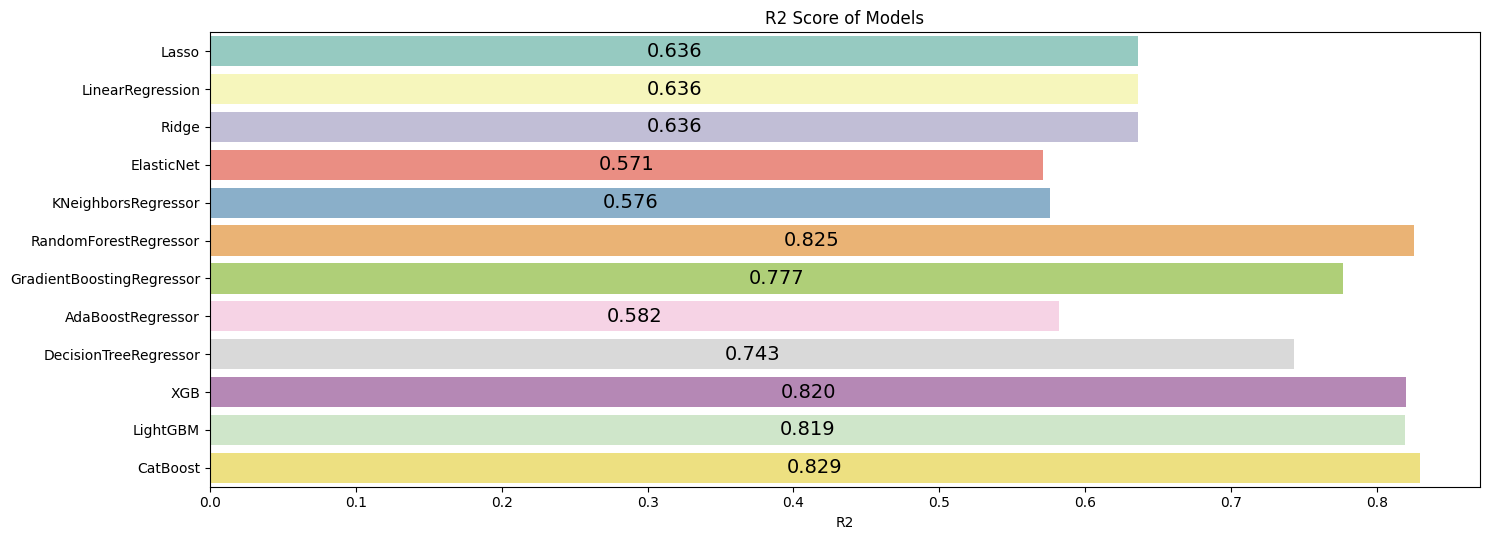

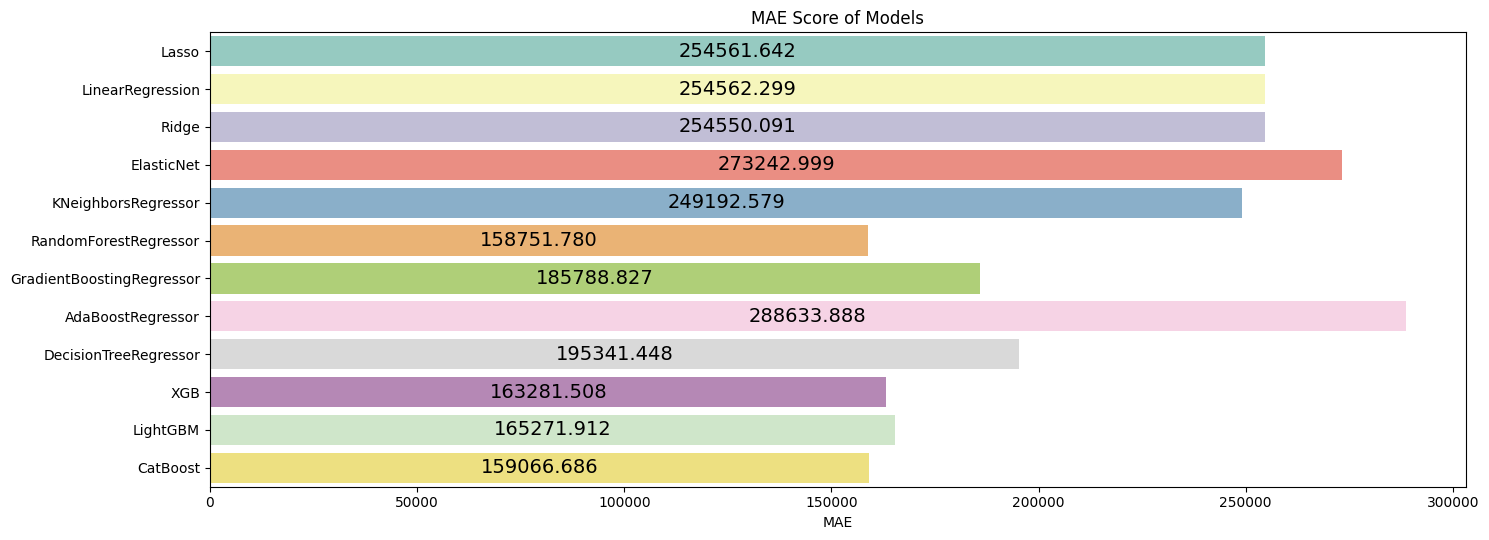

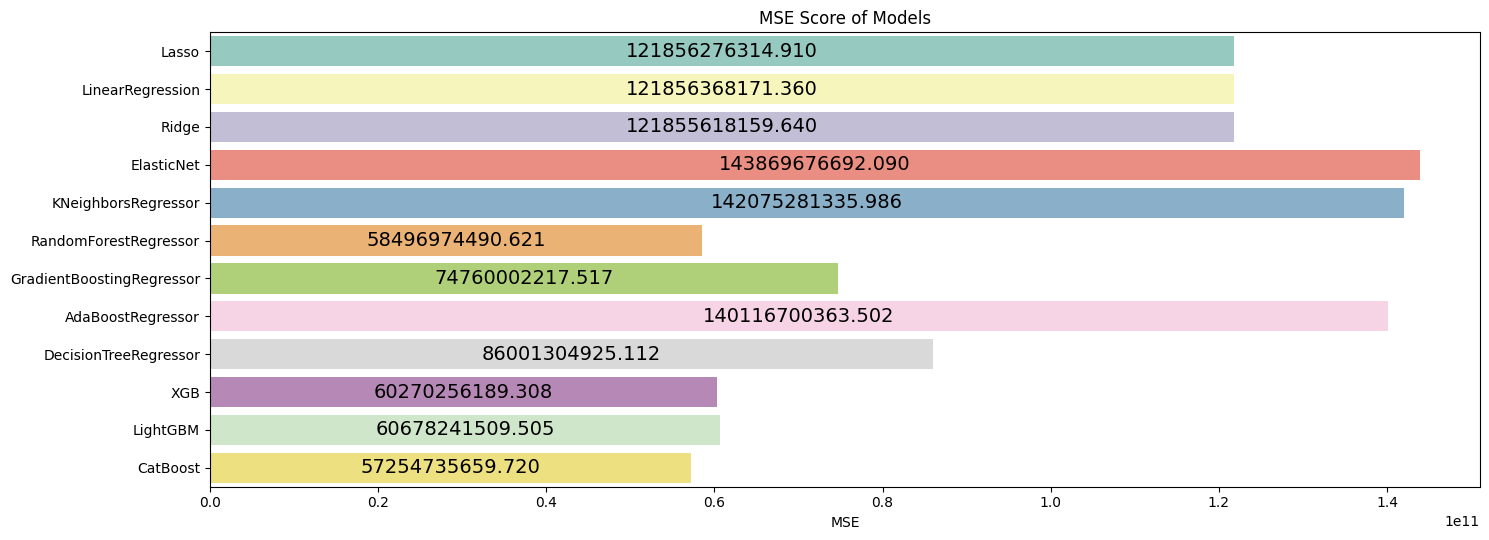

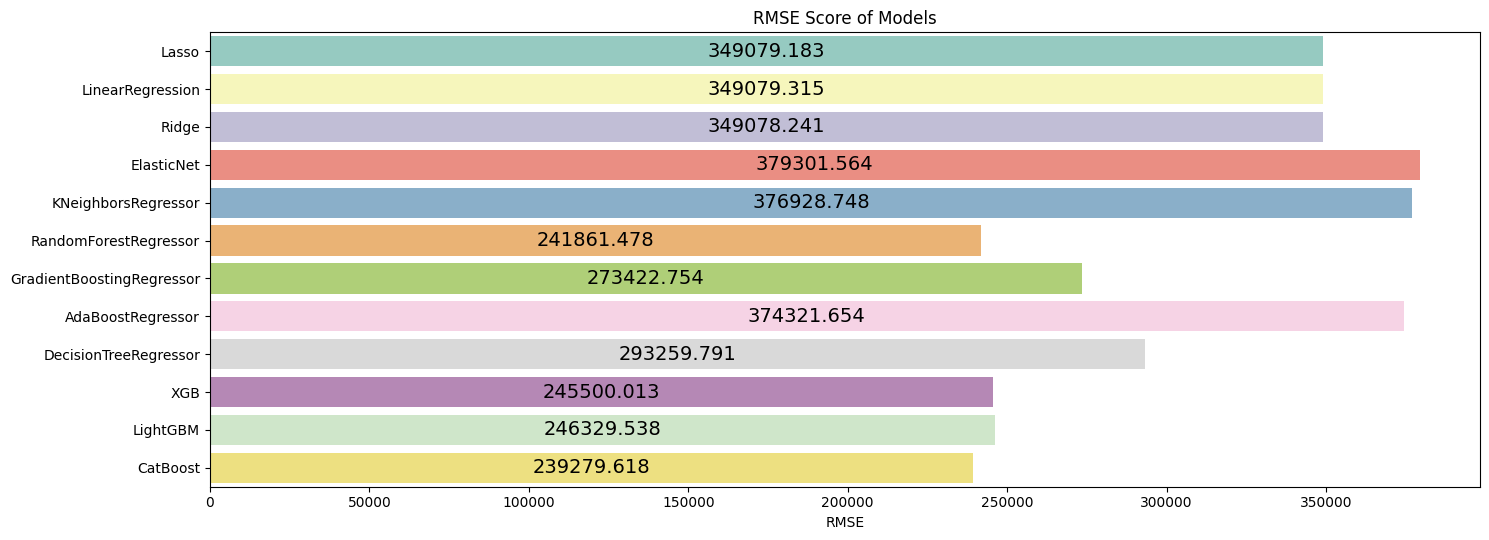

In [41]:
for col in df_scores[['R2', 'MAE', 'MSE', 'RMSE']]:
    plt.figure(figsize=(15, 5.5))
    ax = sns.barplot(data=df_scores, x=col, y='Model', palette='Set3');
    
    for container in ax.containers:
        ax.bar_label(container,  fmt='{:1.3f}', 
                     fontsize=14,  label_type='center')
    ax.set(ylabel='')
    plt.title(f'{col} Score of Models')
    plt.tight_layout()

<a id="section-twelve"></a>
## **3. Hyper Parameter Optimization**

* Four model have been chosen for hyperparameter tuning. These are:
    - LGBM
    - XGB
    - CatBoost
    - Random Forest
* After (shallow) hyperparameter tuning with GridSearchCv (may give better results with Optuna), **CatBoost** has better result than others.

In [42]:
def base_models(X, y, scoring="r2"):
    models = [('Lasso', Lasso()),
              ('LinearRegression', LinearRegression()),
              ('Ridge', Ridge()),
              ('ElasticNet', ElasticNet()),
              ('KNeighborsRegressor', KNeighborsRegressor()),
              ('RandomForestRegressor', RandomForestRegressor()),
              ('GradientBoostingRegressor', GradientBoostingRegressor()),
              ('AdaBoostRegressor', AdaBoostRegressor(n_estimators = 5, 
                                                      learning_rate = 1.2, 
                                                      loss = 'exponential', 
                                                      random_state = 2)),
              ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth = 9, 
                                                              min_samples_split = 4, 
                                                              random_state = 1)),
              ('XGB', XGBRegressor(random_state=17, eval_metric='logloss')),
              ('LightGBM', LGBMRegressor(random_state=17, verbose=-1)),
              ('CatBoost', CatBoostRegressor(verbose=False))]
    
    for name, regressor in models:
        cv_results = cross_validate(regressor, X, y, cv=5, scoring=scoring)
        print(f"R2: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [43]:
LGBM_params = {'n_estimators': [100, 300, 500],
               'learning_rate': [0.01, 0.1, 0.2],
               'max_depth': [5, 7, 9]}

XGB_Regressor_params = {'n_estimators': [100, 300, 500],
                        'learning_rate': [0.01, 0.1, 0.2],
                        'max_depth': [5, 7, 9]}

CatBoost_params = {'iterations': [100, 500, 1000],
                   'learning_rate': [0.01, 0.1, 0.2],
                   'depth': [5, 7, 9]}

Random_Forest_params = {'n_estimators': [100, 200, 300],
                        'max_depth': [3, 4, 5, None]}

In [44]:
models = [("LightGBM", LGBMRegressor(random_state=17, verbose=-1), LGBM_params),
          ("XGB", XGBRegressor(), XGB_Regressor_params),
          ("CatBoost", CatBoostRegressor(verbose=False), CatBoost_params),
          ("RandomForestRegressor", RandomForestRegressor(), Random_Forest_params)]

In [45]:
def hyperparameter_optimization(X, y, cv=5, scoring="r2"):
    print("\nHyperparameter Optimization....")
    best_models = {}
    for name, regressor, params in models:
        print(f"########## {name} ##########")
        cv_results = cross_validate(regressor, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(regressor, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = regressor.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [46]:
def fit_models(X,y):
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    return best_models

best_models = fit_models(X_train, y_train)

R2: 0.6495 (Lasso) 
R2: 0.6495 (LinearRegression) 
R2: 0.6495 (Ridge) 
R2: 0.5867 (ElasticNet) 
R2: 0.5844 (KNeighborsRegressor) 
R2: 0.8203 (RandomForestRegressor) 
R2: 0.7841 (GradientBoostingRegressor) 
R2: 0.6007 (AdaBoostRegressor) 
R2: 0.7442 (DecisionTreeRegressor) 
R2: 0.8177 (XGB) 
R2: 0.8224 (LightGBM) 
R2: 0.8312 (CatBoost) 

Hyperparameter Optimization....
########## LightGBM ##########
r2 (Before): 0.8224
r2 (After): 0.8287
LightGBM best params: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}

########## XGB ##########
r2 (Before): 0.8177
r2 (After): 0.8294
XGB best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

########## CatBoost ##########
r2 (Before): 0.8312
r2 (After): 0.8321
CatBoost best params: {'depth': 7, 'iterations': 1000, 'learning_rate': 0.1}

########## RandomForestRegressor ##########
r2 (Before): 0.8213
r2 (After): 0.8225
RandomForestRegressor best params: {'max_depth': None, 'n_estimators': 300}



<a id="section-thirteen"></a>
## **4. Importance Visualization of Best Model**

* For the next steps, the best model according to R2 score selected after hyperparameter tuning which is **CatBoost**.
* **Feature Importance** and **Permutation Importance** for CatBoost can be seen in the plot below.

In [47]:
final_model_catboost = best_models['CatBoost'].fit(X_train, y_train)

In [48]:
perm = PermutationImportance(final_model_catboost, random_state=42, n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3317 ± 0.0144,Distance
0.2493 ± 0.0161,Rooms
0.1552 ± 0.0087,Postcode
0.1228 ± 0.0039,Type
0.0910 ± 0.0082,Lattitude
0.0784 ± 0.0067,Longtitude
0.0631 ± 0.0061,Landsize
0.0289 ± 0.0022,CouncilArea
0.0193 ± 0.0024,Bathroom
0.0177 ± 0.0029,BuildingArea


In [49]:
def plot_importance(model, type, features=None, X_test=None, y_test=None, save=False):
    if type == 'feature_importance':
        df_imp = pd.DataFrame({'Value': model.feature_importances_, 
                               'Feature': features.columns})
        
        plt.figure(figsize=(15, 6))
        sns.set(font_scale=1)
        ax = sns.barplot(x="Feature", y="Value", 
                         data=df_imp.sort_values(by="Value", ascending=False),
                         palette='Set3')

        for container in ax.containers:
            ax.bar_label(container,  fmt="{:1.2f}", fontsize=12)
        plt.title('Feature Importance')
        plt.xticks(rotation=30)
        plt.tight_layout()
        if save:
            plt.savefig("feature_importance.png")
        plt.show()
        
    elif type == 'permutation_importance' and features is None:
        model_copy = model.copy()
        perm = PermutationImportance(model_copy, random_state=42, n_iter=10).fit(X_test, y_test)
        df_imp = pd.DataFrame({'Feature': X_test.columns.tolist(),
                               'Value': perm.feature_importances_, 
                               'Std': perm.feature_importances_std_,})
        
        plt.figure(figsize=(15, 6))
        sns.set(font_scale=1)
        ax = sns.barplot(x="Feature", y="Value", 
                         data=df_imp.sort_values(by="Value", ascending=False),
                         palette='Set3')

        for container in ax.containers:
            ax.bar_label(container,  fmt="{:1.4f}", fontsize=11)
        plt.title('Permutation Importance (test set)')
        plt.xticks(rotation=30)
        plt.tight_layout()
        if save:
            plt.savefig("permutation_importance.png")
        plt.show()
        
    else:
        return f'Unsupported importance type.'

<a id="section-fourteen"></a>
### **4.a. Feature Importance**

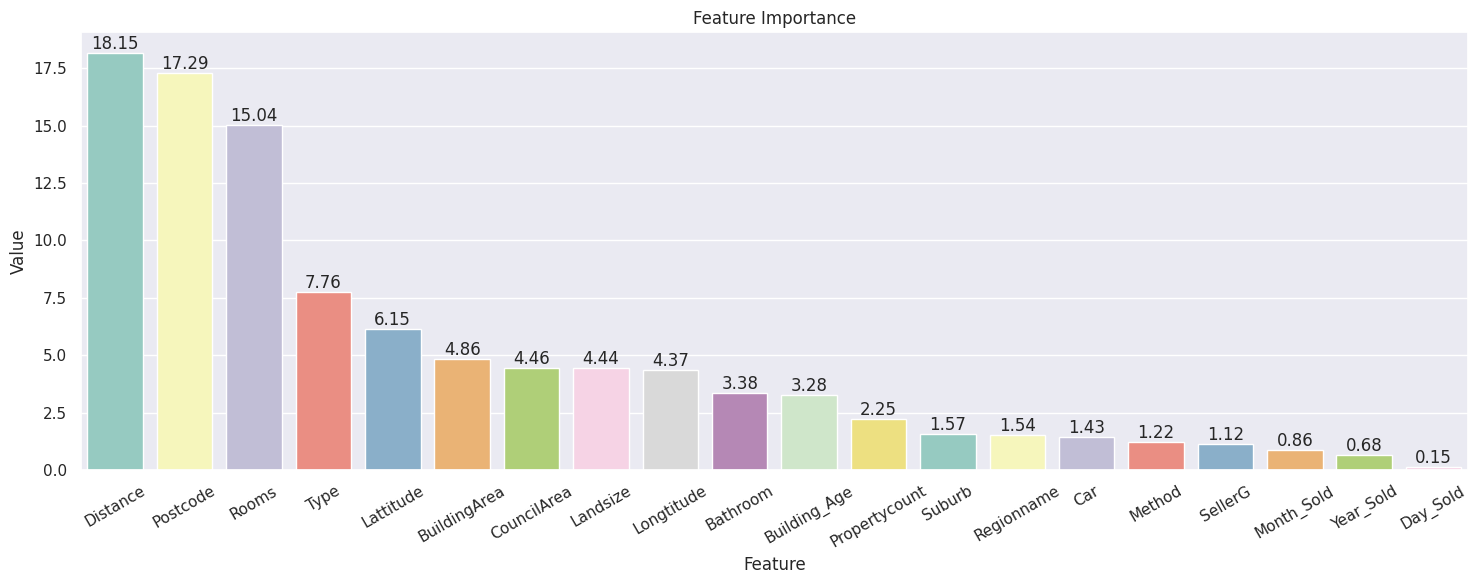

In [50]:
plot_importance(final_model_catboost, 'feature_importance', X)

<a id="section-fifteen"></a>
### **4.b. Permutation Importance**

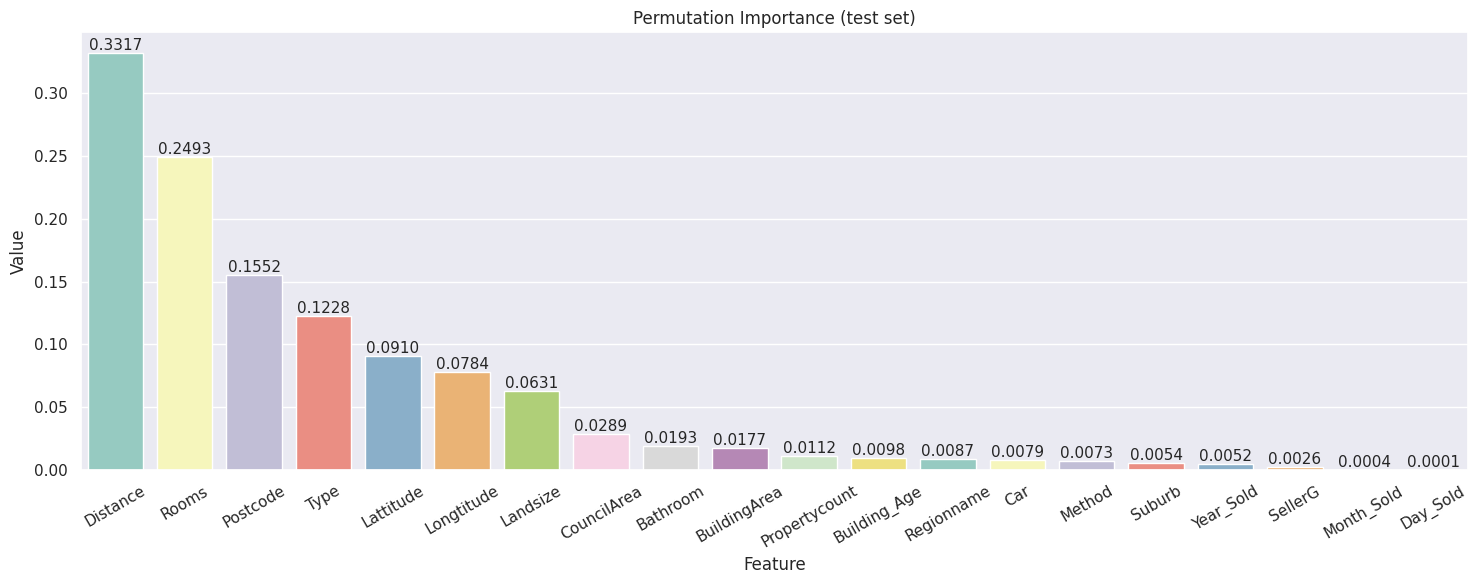

In [51]:
plot_importance(final_model_catboost, type='permutation_importance', X_test=X_test, y_test=y_test)

<a id="section-sixteen"></a>
## **5. Final Model**

* Performance metrics of the best model were calculated.
* At last but not least, the best model CatBoost was trained with the entire dataset and saved for further work.

In [52]:
scores_r2 = cross_val_score(final_model_catboost, X, y, cv=5, scoring='r2')
print(f"R2  : {np.mean(scores_r2):.4f} (+/- {np.std(scores_r2):.4f})")

scores_mae = -cross_val_score(final_model_catboost, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE : {np.mean(scores_mae):.4f} (+/- {np.std(scores_mae):.4f})")

scores_mse = -cross_val_score(final_model_catboost, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"MSE : {np.mean(scores_mse):.4f} (+/- {np.std(scores_mse):.4f})")

scores_rmse = np.sqrt(scores_mse)
print(f"RMSE: {np.mean(scores_rmse):.4f} (+/- {np.std(scores_rmse):.4f})")

R2  : 0.8188 (+/- 0.0169)
MAE : 164913.2183 (+/- 16776.5596)
MSE : 60774076049.2037 (+/- 10051769063.2648)
RMSE: 245725.6287 (+/- 19824.0118)


In [53]:
final_model_catboost.fit(X, y)

joblib.dump(final_model_catboost, 'final_model_catboost.pkl')

['final_model_catboost.pkl']

In [54]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(perm, threshold=0.01, prefit=True)
X_trans = sel.transform(X)

In [55]:
final_model_catboost.fit(X_trans, y)
scores_r2 = cross_val_score(final_model_catboost, X_trans, y, cv=5, scoring='r2')
print(f"R2  : {np.mean(scores_r2):.4f} (+/- {np.std(scores_r2):.4f})")

scores_mae = -cross_val_score(final_model_catboost, X_trans, y, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE : {np.mean(scores_mae):.4f} (+/- {np.std(scores_mae):.4f})")

scores_mse = -cross_val_score(final_model_catboost, X_trans, y, cv=5, scoring='neg_mean_squared_error')
print(f"MSE : {np.mean(scores_mse):.4f} (+/- {np.std(scores_mse):.4f})")

scores_rmse = np.sqrt(scores_mse)
print(f"RMSE: {np.mean(scores_rmse):.4f} (+/- {np.std(scores_rmse):.4f})")

R2  : 0.8142 (+/- 0.0221)
MAE : 167916.9475 (+/- 19919.2266)
MSE : 62282726771.4933 (+/- 10845748709.4558)
RMSE: 248655.6487 (+/- 21286.0317)
